In [166]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [63]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [286]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
# Добавляем столбец с целевой переменной
data['target'] = iris.target
# Оставьте два признака - sepal_length и sepal_width

In [485]:
data = data[['sepal length (cm)', 'sepal width (cm)']]

Построем модель LDA

In [96]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [486]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [228]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [229]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2,
       2])

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9130434782608695

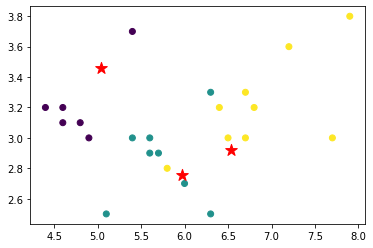

In [231]:
# визуализируем дискриминантную линию
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

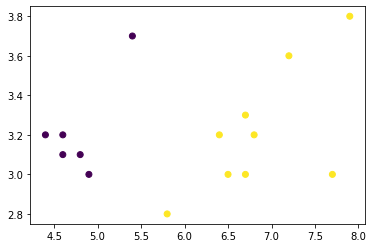

In [232]:
# категории смываются, визуализируем дискриминантную линию только по 2 признакам
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.show()

Кластеризация

In [462]:
from sklearn.cluster import KMeans

In [476]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, data_class, test_size=0.3)

In [477]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [478]:
scaled_train = scaler.fit_transform(X_train1)
scaled_test = scaler.transform(X_test1)

In [479]:
# определяем оптмимальное число кластеров с помощью построения графика локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled_test)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

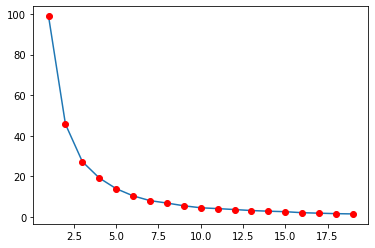

In [480]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [481]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)

In [482]:
# обучаемся и присваиваем каждому объекту кластер
clusters = kmeans.fit_predict(scaled_test)
clusters

array([0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2,
       0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2,
       1])

In [483]:
'''
Почему точность довольно низкая? Может опускаться, вплоть до 0,1... Или здесь это вообще не имеет значения?
'''
accuracy_score(y_test1, clusters) 

0.6

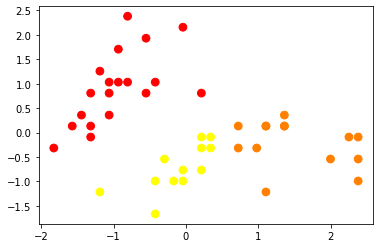

In [484]:
plt.scatter(scaled_test[:, 0], scaled_test[:, 1], cmap='autumn', c=clusters, s=60)